In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import csv
import requests
import gmaps
import os
from api_keys import api_key

In [2]:
# read the air pollution file
air_death_df = pd.read_csv('../resources/7.8.20 UCSD Group Project Dataset - death-rates-from-air-pollution.csv')
# read the happiness files
happiness_2015_raw_df = pd.read_csv('../resources/2015_happiness_data.csv')
happiness_2016_raw_df = pd.read_csv('../resources/2016_happiness_data.csv')
happiness_2017_raw_df = pd.read_csv('../resources/2017_happiness_data.csv')

In [3]:
# Renamed columns
air_death_df = air_death_df.rename(columns={'Entity': 'Country', 'Air pollution (total) (deaths per 100,000)': 'Air Pollution Deaths Per 100k'})
# Dropped un-needed columns
air_death_df2 = air_death_df.drop(['Code', 'Indoor air pollution (deaths per 100,000)', 'Outdoor particulate matter (deaths per 100,000)', 
                         'Outdoor ozone pollution (deaths per 100,000)'], axis=1)
# Reformatted the decimal pointin the air polution column by assigning the column I want to format and then using the 
# .map().format function ont the called column
air_death_df2['Air Pollution Deaths Per 100k'] = air_death_df2['Air Pollution Deaths Per 100k'].map('{:,.2f}'.format)
# Convert string into a float using .astype() function. Ps - this could have been done on the line above as a chain
air_death_df2['Air Pollution Deaths Per 100k'] = air_death_df2['Air Pollution Deaths Per 100k'].astype(float)
air_death_df2

,Country,Year,Air Pollution Deaths Per 100k
0,Afghanistan,1990,299.48
1,Afghanistan,1991,291.28
2,Afghanistan,1992,278.96
3,Afghanistan,1993,278.79
4,Afghanistan,1994,287.16
...,...,...,...
6463,Zimbabwe,2013,143.85
6464,Zimbabwe,2014,138.20
6465,Zimbabwe,2015,132.75
6466,Zimbabwe,2016,128.69


In [4]:
# Remove data from years 1990-2014
# first set the inde
index_df = air_death_df2.set_index('Year')
index_df

,Country,Air Pollution Deaths Per 100k
Year,,
1990,Afghanistan,299.48
1991,Afghanistan,291.28
1992,Afghanistan,278.96
1993,Afghanistan,278.79
1994,Afghanistan,287.16
...,...,...
2013,Zimbabwe,143.85
2014,Zimbabwe,138.20
2015,Zimbabwe,132.75


In [5]:
# Remove data from years 1990-2014
# use .drop() and set the range(1990, 2015)
clean_year_df = index_df.drop(range(1990, 2015), axis=0).drop(2017)
# reset the index
clean_year_df = clean_year_df.reset_index()
clean_year_df.shape # check the shape to see if rows were deleted
clean_year_df

,Year,Country,Air Pollution Deaths Per 100k
0,2015,Afghanistan,191.80
1,2016,Afghanistan,186.67
2,2015,Albania,42.30
3,2016,Albania,41.02
4,2015,Algeria,44.36
...,...,...,...
457,2016,Yemen,97.02
458,2015,Zambia,102.52
459,2016,Zambia,100.57
460,2015,Zimbabwe,132.75


In [6]:
clean_year_df.to_csv('air_pol_year_clean.csv')

In [7]:
# Pull the years data 2015 and 2016
air_death_2015 = clean_year_df[clean_year_df['Year'] == 2015]
air_death_2016 = clean_year_df[clean_year_df['Year'] == 2016]
air_death_2015

,Year,Country,Air Pollution Deaths Per 100k
0,2015,Afghanistan,191.80
2,2015,Albania,42.30
4,2015,Algeria,44.36
6,2015,American Samoa,60.80
8,2015,Andean Latin America,34.60
...,...,...,...
452,2015,Western Sub-Saharan Africa,107.15
454,2015,World,67.08
456,2015,Yemen,99.42
458,2015,Zambia,102.52


In [8]:
air_2015_df = air_death_2015.sort_values('Air Pollution Deaths Per 100k', ascending=False)
air_2015_df = air_2015_df.drop(['Year'], axis=1)
air_2015_df.columns = ['Country', '2015 Air Pollution Deaths Per 100k']
air_2016_df = air_death_2016.sort_values('Air Pollution Deaths Per 100k', ascending=False)
air_2016_df = air_2016_df.drop(['Year'], axis=1)
air_2016_df.columns = ['Country', '2016 Air Pollution Deaths Per 100k']
air_2016_df

,Country,2016 Air Pollution Deaths Per 100k
317,Papua New Guinea,249.27
75,Central African Republic,202.46
307,Oceania,198.84
365,Solomon Islands,189.48
1,Afghanistan,186.67
...,...,...
21,Australasia,10.29
189,Iceland,9.92
397,Sweden,9.28
287,New Zealand,8.65


In [9]:
#create one datafram with the columns: country, 2015 deaths, 2016 deaths. 
air_quality_df = air_2015_df.merge(air_2016_df, on = 'Country', how = 'inner')
air_quality_df

,Country,2015 Air Pollution Deaths Per 100k,2016 Air Pollution Deaths Per 100k
0,Papua New Guinea,254.73,249.27
1,Central African Republic,205.85,202.46
2,Oceania,203.30,198.84
3,Solomon Islands,192.32,189.48
4,Afghanistan,191.80,186.67
...,...,...,...
226,Australasia,10.99,10.29
227,Iceland,10.74,9.92
228,Sweden,9.85,9.28
229,New Zealand,9.38,8.65


In [10]:
air_quality_df.to_csv('jay_pollution_deaths.csv')

In [11]:
happiness_2015_df = happiness_2015_raw_df[['Country', 'Happiness Rank']]
happiness_2015_df.columns = ['Country', '2015 Happiness Rank']
happiness_2016_df = happiness_2016_raw_df[['Country', 'Happiness Rank']]
happiness_2016_df.columns = ['Country', '2016 Happiness Rank']
happiness_2015_df

,Country,2015 Happiness Rank
0,Switzerland,1
1,Iceland,2
2,Denmark,3
3,Norway,4
4,Canada,5
...,...,...
153,Rwanda,154
154,Benin,155
155,Syria,156
156,Burundi,157


In [12]:
happiness_2015_2016_df = happiness_2015_df.merge(happiness_2016_df, on='Country', how='inner')
happiness_2015_2016_df

,Country,2015 Happiness Rank,2016 Happiness Rank
0,Switzerland,1,2
1,Iceland,2,3
2,Denmark,3,1
3,Norway,4,4
4,Canada,5,6
...,...,...,...
146,Rwanda,154,152
147,Benin,155,153
148,Syria,156,156
149,Burundi,157,157


In [13]:
pollution_deaths_to_happiness_df = happiness_2015_2016_df.merge(air_quality_df, on='Country', how='inner')
pollution_deaths_to_happiness_df

,Country,2015 Happiness Rank,2016 Happiness Rank,2015 Air Pollution Deaths Per 100k,2016 Air Pollution Deaths Per 100k
0,Switzerland,1,2,12.92,11.98
1,Iceland,2,3,10.74,9.92
2,Denmark,3,1,19.89,19.32
3,Norway,4,4,11.47,10.86
4,Canada,5,6,12.22,11.00
...,...,...,...,...,...
139,Rwanda,154,152,100.56,98.50
140,Benin,155,153,119.29,115.81
141,Syria,156,156,65.14,64.84
142,Burundi,157,157,146.91,144.36


In [14]:
pollution_deaths_to_happiness_df.to_csv('pollution_deaths_to_happiness.csv')

In [15]:
#create a heatmap with deaths using api calls
countries = pollution_deaths_to_happiness_df['Country']
countries

0      Switzerland
1          Iceland
2          Denmark
3           Norway
4           Canada
          ...     
139         Rwanda
140          Benin
141          Syria
142        Burundi
143           Togo
Name: Country, Length: 144, dtype: object

In [16]:
# slice dataframes with just target countries

In [17]:
# do a function def() to plot all the scatter plots
# do a regression line
# get a ptest
# do subplots

In [18]:
def regress_func(x_axis, y_axis, xlabel, ylabel, table_name, fig_name):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)
    line = slope * x_axis + intercept
    plt.scatter(x_axis, y_axis, alpha=.6, edgecolor='black')
    plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(table_name)
    plt.legend()
    plt.grid()
    print(f"The P-value is {pvalue} and R-squared value {rvalue*rvalue}")
#     plt.savefig(fig_name)
#     print(f"The R-squared value is {rvalue*rvalue}")

The P-value is 2.6623121663067857e-31 and R-squared value 0.615883897472146


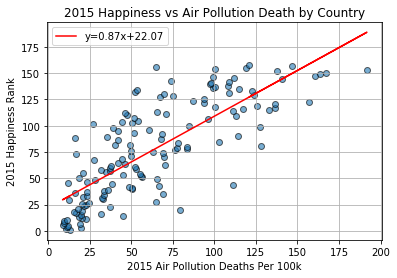

In [19]:
regress_func(pollution_deaths_to_happiness_df['2015 Air Pollution Deaths Per 100k'],
             pollution_deaths_to_happiness_df['2015 Happiness Rank'],
             '2015 Air Pollution Deaths Per 100k',
             '2015 Happiness Rank',
             '2015 Happiness vs Air Pollution Death by Country',
             'fig_happines_airdeath2015'
            )

In [20]:
# Write analysis

The P-value is 1.9425031471155874e-32 and R-squared value 0.6297318163453075


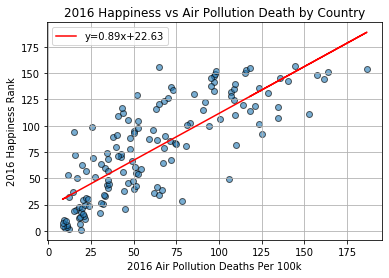

In [21]:
regress_func(pollution_deaths_to_happiness_df['2016 Air Pollution Deaths Per 100k'],
             pollution_deaths_to_happiness_df['2016 Happiness Rank'],
             '2016 Air Pollution Deaths Per 100k',
             '2016 Happiness Rank',
             '2016 Happiness vs Air Pollution Death by Country',
             'fig_happines_airdeath2016'
            )

In [22]:
# Write analysis

In [50]:
# Setup data for heat map
# pull lat and long for each country
# create a loop
# create a new column in the dataframe
pollution_deaths_to_happiness_df['Latitude'] = ''
pollution_deaths_to_happiness_df['Longitude'] = ''

for index, row in pollution_deaths_to_happiness_df.iterrows():
    url = f"https://maps.googleapis.com/maps/api/geocode/json?address={country}&key={api_key}"
    country = row['Country']
    request = requests.get(url).json()
    pollution_deaths_to_happiness_df.loc[index, 'Latitude'] = request['results'][0]['geometry']['location']['lat']
    pollution_deaths_to_happiness_df.loc[index, 'Longitude'] = request['results'][0]['geometry']['location']['lng']

pollution_deaths_to_happiness_df

,Country,2015 Happiness Rank,2016 Happiness Rank,2015 Air Pollution Deaths Per 100k,2016 Air Pollution Deaths Per 100k,Latitude,Longitude
0,Switzerland,1,2,12.92,11.98,8.61954,0.824782
1,Iceland,2,3,10.74,9.92,46.8182,8.22751
2,Denmark,3,1,19.89,19.32,64.9631,-19.0208
3,Norway,4,4,11.47,10.86,56.2639,9.50178
4,Canada,5,6,12.22,11.00,60.472,8.46895
...,...,...,...,...,...,...,...
139,Rwanda,154,152,100.56,98.50,33.9391,67.71
140,Benin,155,153,119.29,115.81,-1.94028,29.8739
141,Syria,156,156,65.14,64.84,9.30769,2.31583
142,Burundi,157,157,146.91,144.36,34.8021,38.9968


In [55]:

# Store latitiude and longitude in locations variable
locations = pollution_deaths_to_happiness_df[['Latitude', 'Longitude']]
# Store humidty data as the weight
deaths = pollution_deaths_to_happiness_df['2015 Air Pollution Deaths Per 100k']
# Configure gmap
gmaps.configure(api_key=api_key)
figure = gmaps.figure()
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=deaths, 
                                 dissipating=False, point_radius=3,
                                 max_intensity=100)
                                 
# # Add heat map layer to fig with .add_layer() function
figure.add_layer(heat_layer)
# # Display figure
figure

Figure(layout=FigureLayout(height='420px'))